Разведочный анализ данных на примере датасета с рейтингом фильмов

In [30]:
# первичный осмотр данных
import pandas as pd


df = pd.read_csv('sample_data/Netflix TV Shows and Movies.csv')

df.head()

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0
1,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0
2,2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.0,392419.0
3,3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.1,391942.0
4,4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0


In [9]:
df.info()
df.shape
df.isnull().sum() # тут смотрим количество нуллов в каждом столбце

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5283 entries, 0 to 5282
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              5283 non-null   int64  
 1   id                 5283 non-null   object 
 2   title              5283 non-null   object 
 3   type               5283 non-null   object 
 4   description        5278 non-null   object 
 5   release_year       5283 non-null   int64  
 6   age_certification  2998 non-null   object 
 7   runtime            5283 non-null   int64  
 8   imdb_id            5283 non-null   object 
 9   imdb_score         5283 non-null   float64
 10  imdb_votes         5267 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 454.1+ KB


,0
index,0
id,0
title,0
type,0
description,5
release_year,0
age_certification,2285
runtime,0
imdb_id,0
imdb_score,0


In [10]:
# описательная статистика
df.describe()

,index,release_year,runtime,imdb_score,imdb_votes
count,5283.000000,5283.000000,5283.000000,5283.000000,5.267000e+03
mean,2641.000000,2015.879992,79.199886,6.533447,2.340719e+04
std,1525.215067,7.346098,38.915974,1.160932,8.713432e+04
min,0.000000,1953.000000,0.000000,1.500000,5.000000e+00
25%,1320.500000,2015.000000,45.000000,5.800000,5.210000e+02
50%,2641.000000,2018.000000,87.000000,6.600000,2.279000e+03
75%,3961.500000,2020.000000,106.000000,7.400000,1.014400e+04
max,5282.000000,2022.000000,235.000000,9.600000,2.268288e+06


In [11]:
df['type'].value_counts()

,count
type,
MOVIE,3407
SHOW,1876


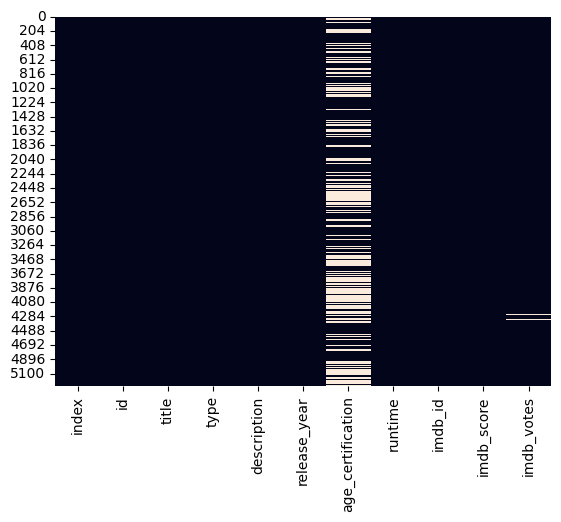

In [12]:
# анализ нуллов
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [14]:
df['age_certification'].fillna('404', inplace=True)

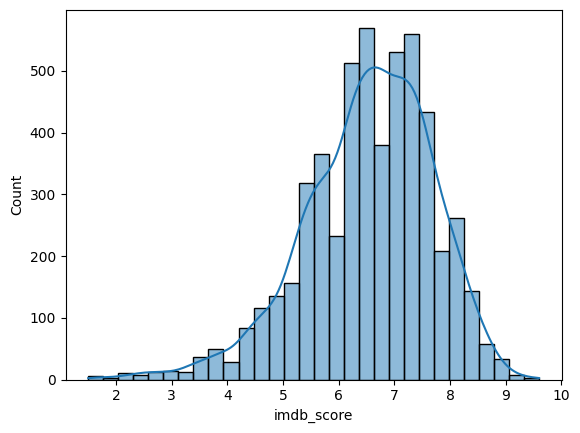

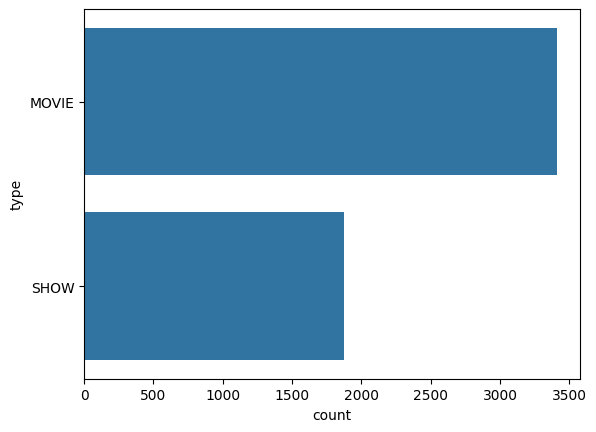

In [16]:
# распределение по рейтингу
sns.histplot(df['imdb_score'], bins=30, kde=True)
plt.show()

# распределение по типу
sns.countplot(df['type'])
plt.show()

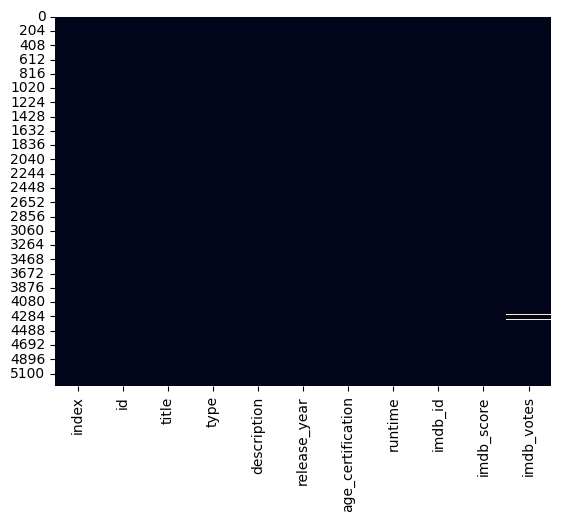

In [17]:
# снова посмотрим нуллы
sns.heatmap(df.isnull(), cbar=False)
plt.show()

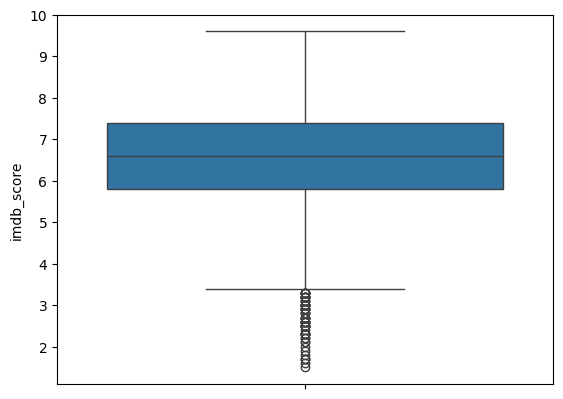

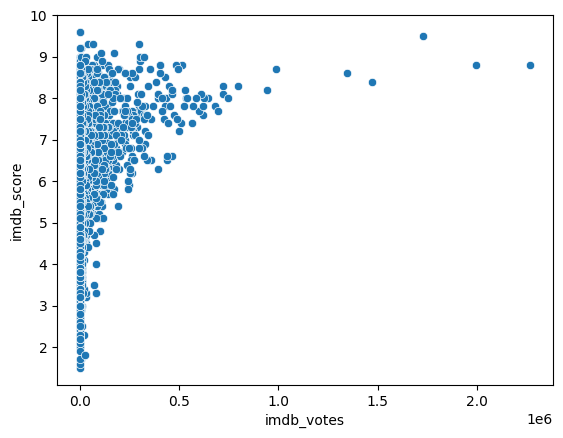

In [20]:
# проанализируем выбросы по голосам в imdb
sns.boxplot(df['imdb_score'])
plt.show()

# посмотрим зависимость между кол-вом голосов и средней оценкой
sns.scatterplot(x='imdb_votes', y='imdb_score', data=df)
plt.show()

In [23]:
# здесь должна быть тепловая карта, но пока ее нет

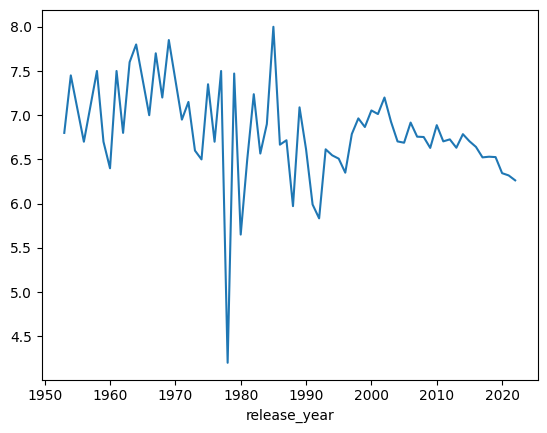

In [26]:
# средний рейтинг по годам (временной ряд)
df.groupby('release_year')['imdb_score'].mean().plot()
plt.show()

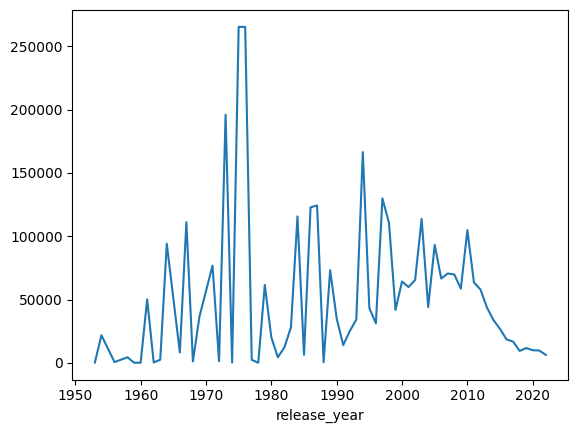

In [27]:
# среднее количество голосов по годам
df.groupby('release_year')['imdb_votes'].mean().plot()
plt.show()

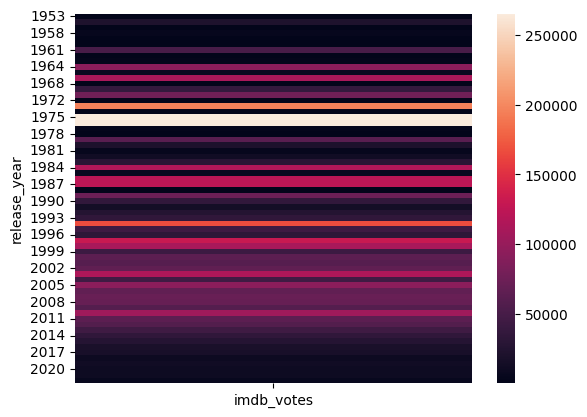

In [28]:
# тоже самое в виде тепловой карты
sns.heatmap(df.groupby('release_year')['imdb_votes'].mean().to_frame())
plt.show()

Выводы
<!-- 1. В датасете 5283 строки и 11 колонок
2. Имеется связь между количеством оценок и средней оценкой: чем больше оценок, тем выше средняя оценка фильма/шоу/сериала
3. Фильмы/шоу/сериалы, вышедшие в середине 1970-х являются более популярными среди оценщиков -->